In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_style('ticks')
sns.set_palette(sns.hls_palette(8, l=.6, s=.6))
sns.set_context("notebook", font_scale=1.4)

def getColumn(df1, label):
    df2 = df1.filter([label], axis=1)
    df2['pair'] = pd.Series(label, index=df1.index)
    df2.columns = ['rate', 'pair']

    return df2

def unitColumn(df, label):
    d = {'rate': pd.Series(1.0, index=df.index), 'pair': pd.Series('ct', index=df.index)}
    df1 = pd.DataFrame(data=d, index=df.index)
    return df1



def loadDataOld(filename, burnin):
    df = pd.DataFrame.from_csv(filename, sep='\t', header=3, index_col=None)

    #remove burnin
    df.drop(df.head(burnin).index, inplace=True)
    
    df1 = getColumn(df, 'ac')          
    df1 = df1.append(getColumn(df, 'ag'), ignore_index=True)          
    df1 = df1.append(getColumn(df, 'at'), ignore_index=True)          
    df1 = df1.append(getColumn(df, 'cg'), ignore_index=True) 
    df1 = df1.append(unitColumn(df, 'ct'), ignore_index=True)
    df1 = df1.append(getColumn(df, 'gt'), ignore_index=True)          

    return df1

def loadDataNew(filename, burnin):
    df = pd.DataFrame.from_csv(filename, sep='\t', header=3, index_col=None)

    #remove burnin
    df.drop(df.head(burnin).index, inplace=True)
    
    df1 = getColumn(df, 'gtr.ratesrateAC')          
    df1 = df1.append(getColumn(df, 'gtr.ratesrateAG'), ignore_index=True)          
    df1 = df1.append(getColumn(df, 'gtr.ratesrateAT'), ignore_index=True)          
    df1 = df1.append(getColumn(df, 'gtr.ratesrateCG'), ignore_index=True) 
    df1 = df1.append(getColumn(df, 'gtr.ratesrateCT'), ignore_index=True) 
    df1 = df1.append(getColumn(df, 'gtr.ratesrateGT'), ignore_index=True)          

    return df1

def loadData(filename, burnin, treatment):
    df = pd.DataFrame.from_csv(filename, sep='\t', header=3, index_col=None)

    #remove burnin
    df.drop(df.head(burnin).index, inplace=True)

    #extract columns
    df = df.filter(['meanRate','treeModel.rootHeight', 'constant.popSize'], axis=1)

    #add a treatment column
    df['treatment'] = pd.Series(treatment, index=df.index)

    return df

In [3]:
df_old_equal = loadDataOld('oldPar_allEqual.log', 1000)
df_old_diff = loadDataOld('oldPar_allDifferent.log', 1000)
df_new_equal = loadDataNew('newPar_allEqual.log', 1000)
df_new_diff = loadDataNew('newPar_allDifferent.log', 1000)

df = loadData('oldPar_allEqual.log', 1000, 'oldPar_allEqual')
df = df.append(loadData('newPar_allEqual.log', 1000, 'newPar_allEqual'), ignore_index=True)
df = df.append(loadData('oldPar_allDifferent.log', 1000, 'oldPar_allDifferent'), ignore_index=True)
df = df.append(loadData('newPar_allDifferent.log', 1000, 'newPar_allDifferent'), ignore_index=True)




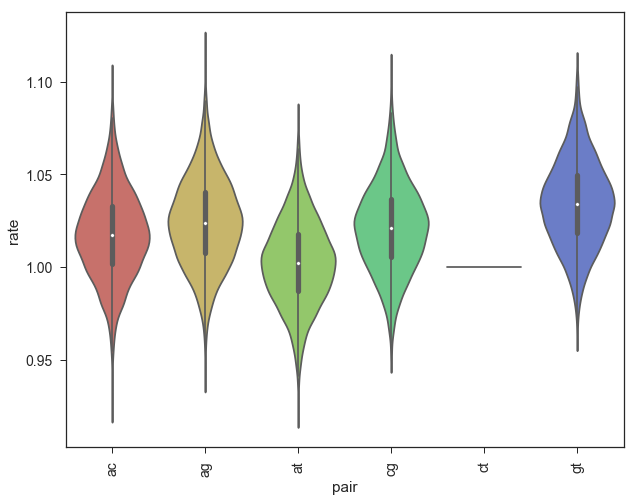

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)

ax = sns.violinplot(x="pair", y="rate", data=df_old_equal, cut=0, scale="width")
for label in ax.get_xticklabels():
    label.set_rotation(90)

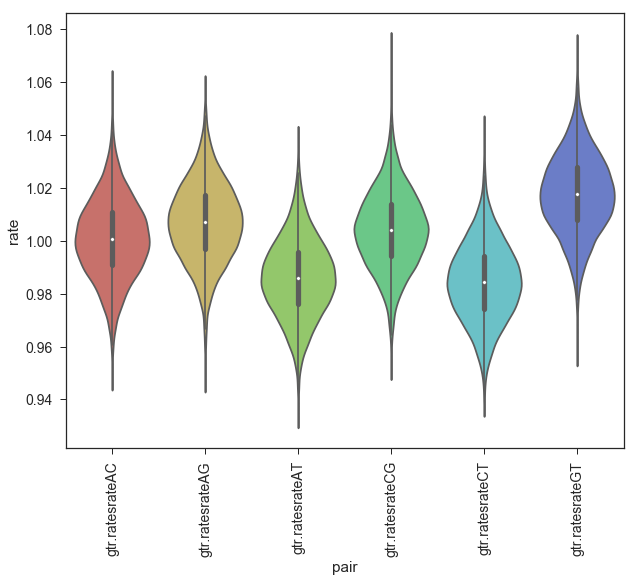

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)

ax = sns.violinplot(x="pair", y="rate", data=df_new_equal, cut=0, scale="width")
for label in ax.get_xticklabels():
    label.set_rotation(90)

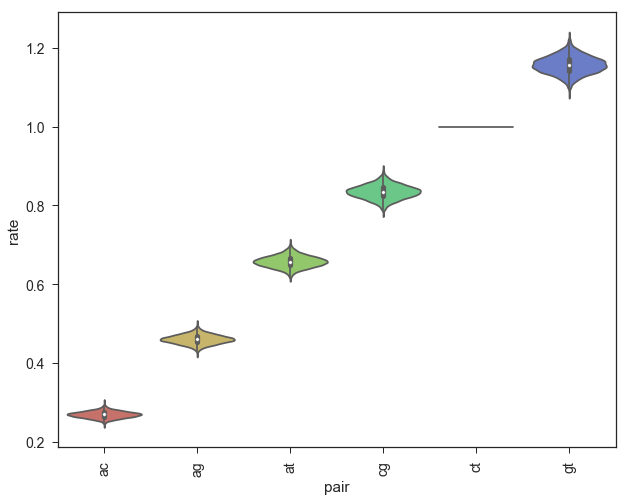

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)

ax = sns.violinplot(x="pair", y="rate", data=df_old_diff, cut=0, scale="width")
for label in ax.get_xticklabels():
    label.set_rotation(90)

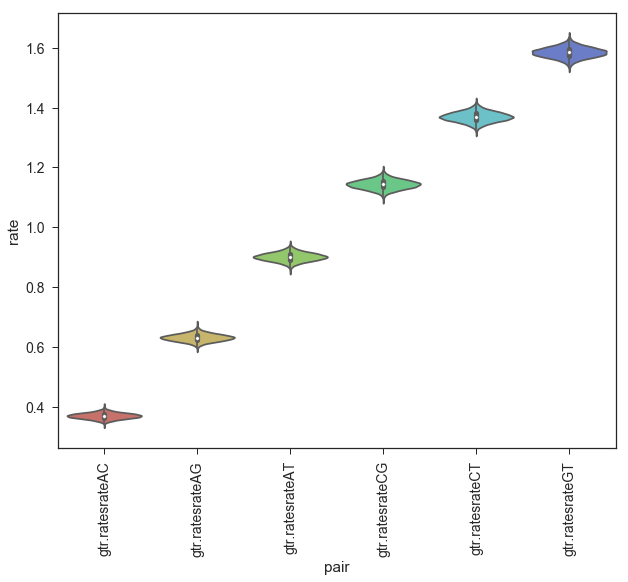

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)

ax = sns.violinplot(x="pair", y="rate", data=df_new_diff, cut=0, scale="width")
for label in ax.get_xticklabels():
    label.set_rotation(90)

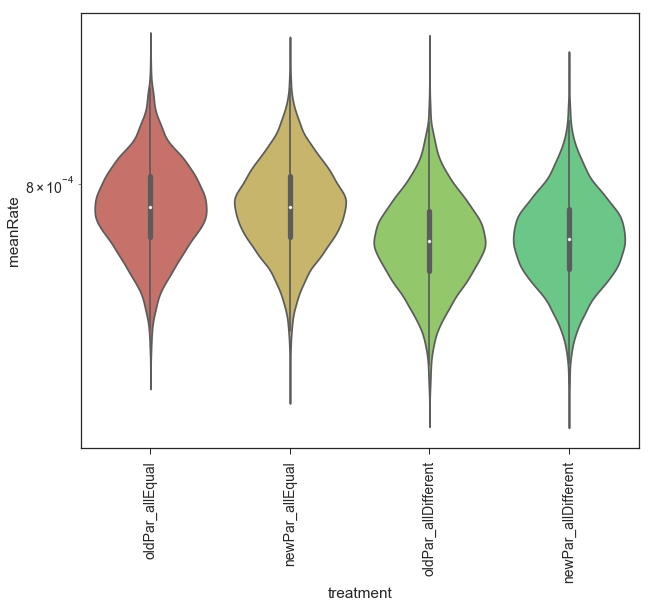

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)

ax = sns.violinplot(x="treatment", y="meanRate", data=df, scale="width")
ax.set(yscale="log")
for label in ax.get_xticklabels():
    label.set_rotation(90)